#  <font color='blue'>Linear Regression</font>

In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. The tasks herewith are to
* use built-in model and functions from scikit-learn, as benchmark solution
* implement analytical solution, namely normal eqaution
* implement numerical solution, namely batch gradient descent
* compare the results and plots between benchmark and self-implement model

# 1: Import all relevant packages

In [2]:
import numpy as np     # 用来做数学运算
import pandas as pd    # 用来处理数据表

# 将所有图都在 Notebook 里显示
%matplotlib inline               
import matplotlib.pyplot as plt  # 用来画图

from sklearn.cross_validation import train_test_split     # 做交叉验证，划分训练集和测试集
from sklearn.linear_model import LinearRegression         # 基准模型

# 2: Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = pd.read_csv('kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
sales.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [6]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
print sales.shape
print '------------------------'
print sales.dtypes

(21613, 21)
------------------------
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


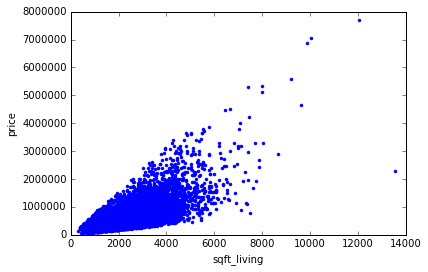

In [8]:
plt.plot( sales['sqft_living'], sales['price'], 'b.' )
plt.xlabel('sqft_living')
plt.ylabel('price')

# 3: Split data into training and test

In [9]:
(training_data, test_data) = train_test_split( sales, train_size=0.8, random_state=0 )
print 'The number of rows and columns of training data is', training_data.shape
print 'The number of rows and columns of test data is', test_data.shape
ratio = training_data.shape[0] / float(test_data.shape[0])
print 'The ratio of training data and test data is %.2f' %(ratio)

The number of rows and columns of training data is (17290, 21)
The number of rows and columns of test data is (4323, 21)
The ratio of training data and test data is 4.00


# Algorithm

## <font color='red'>Data Processor</font>

In [10]:
# Assign feature and label variables
input_label = ['sqft_living']
output_label = ['price']

training_input = training_data[input_label].values
training_output  = training_data[output_label].values
test_input = test_data[input_label].values
test_output  = test_data[output_label].values

## <font color='red'>Benchmark: Scikit-learn</font>

In [11]:
# Create the model
model = LinearRegression( normalize=True )

# Train the model on the training set
model.fit( training_input, training_output )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [12]:
# The coefficients, mean squared error
print 'Benchmark Solution:'
print 'Intercept:', model.intercept_[0]
print 'Slope    :', model.coef_[0][0]
print "MSE      : %.2f" % np.mean((model.predict(test_input) - test_output) ** 2)

Benchmark Solution:
Intercept: -48536.6900583
Slope    : 284.14771038
MSE      : 62014619472.34


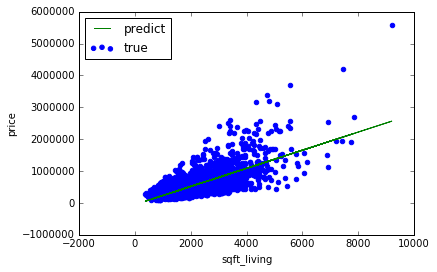

In [13]:
# Plot test data and the model prediction
plt.scatter( test_input, test_output,  color='blue', label="true" )
plt.plot( test_input, model.predict(test_input), color='green', label="predict" )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='upper left')

## <font color='red'>Self-implement: Mean Machine</font> 

In [14]:
def predict( X, w ):
    
    m = X.shape[0]
    X = np.hstack( (np.ones((m,1)), X) )
    y = X.dot(w)
    
    return y

In [15]:
def cost_function( X, y, w ):
    
    m = X.shape[0]
    e = X.dot(w) - y
    J = 0.5/m * np.dot( e.T, e )
    
    return J[0]

In [16]:
def normalize( X ):
    
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X = (X-mu)/sigma
    
    return (X, mu, sigma)

In [17]:
def normal_equation( X, y, lbd=0 ):
    
    n = X.shape[1]
    I = np.eye(n)
    xTx = X.T.dot(X) + lbd * I
    w = (np.linalg.inv(xTx).dot(X.T)).dot(y)
    
    return w

In [18]:
def batch_gradient_descent( X, y, w0, eta=0.1, eps=1e-4, num_iters=2000 ):
    
    converged = False
    w = np.array( w0 )
    J = np.zeros( num_iters )
    m = X.shape[0]
    counter = 0
    
    while not converged and counter <= num_iters-1:
        gradient = np.dot( X.T, X.dot(w) - y )
        w -= eta*gradient/m
 
        gradient_magnitude = np.sqrt( np.dot( gradient.T, gradient )  )   
        J[counter] = cost_function( X, y, w )
        
        # print 'Iteration:', counter+1, ': J(w) =', J[counter], "|J(W)| = ", gradient_magnitude
        
        if gradient_magnitude < eps:
            converged = True
            
        counter += 1
    
    if counter != num_iters:
        J[counter:] = J[counter-1]
        
    return ( w, J )

In [19]:
def MSE( X, y, w ):
    
    return np.mean((predict(X,w) - y) ** 2)

In [20]:
m = training_input.shape[0]
X = np.hstack( (np.ones((m,1)), training_input) )
y = training_output

# The coefficients, mean squared error
w = normal_equation( X, y )
print 'Analytical Solution:'
print 'Intercept:', w[0]
print 'Slope    :', w[1:]
print "MSE      : %.2f" % MSE( test_input, test_output, w )

Analytical Solution:
Intercept: [-48536.69005829]
Slope    : [[ 284.14771038]]
MSE      : 62014619472.34


In [21]:
m = training_input.shape[0]
[ X, mu, sigma ] = normalize( training_input )
X = np.hstack( (np.ones((m,1)), X) )
n = X.shape[1]

w0 = np.zeros( (n,1) )
eta = 0.1
eps = 1e-4

# The coefficients, mean squared error
( w, J ) = batch_gradient_descent( X, y, w0, eta, eps )
print 'Numerical Solution:'
print 'Intercept:', w[0] - np.dot(mu/sigma,w[1:])
print 'Slope    :', w[1:]/sigma[:,np.newaxis]
print "MSE      : %.2f" % MSE( (test_input-mu)/sigma, test_output, w )

Numerical Solution:
Intercept: [-48536.69005829]
Slope    : [[ 284.14771038]]
MSE      : 62014619472.34


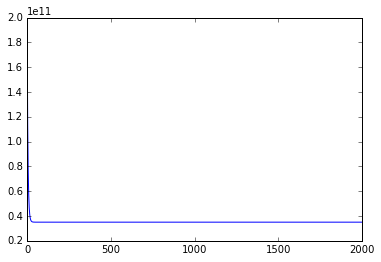

In [22]:
# plot the cost function
plt.plot(J)

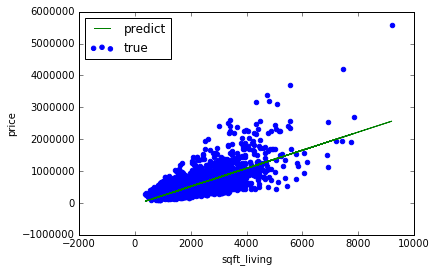

In [23]:
# Plot test data and the model prediction
plt.scatter( test_input, test_output,  color='blue', label = "true" )
plt.plot(test_input, predict((test_input-mu)/sigma,w), color='green', label='predict' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='upper left')